# Plotting

This file is responsible for plotting the results of the models.
The data should be shown in an easy-to-understand manner and all plots should have some guidance
on interpretation and background.

Follow the following guidance:
- Make all assumptions clear.
- Do not hardcode any variables. All must be visible in the sources tab.
- No data computations may be done and only data from ../results may be accessed.

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cycler
from typing import List, Union, Literal
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import sys

# Set matlplotlib to inline mode
%matplotlib inline

In [ ]:
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [ ]:
# Import the configurations
from configs import FILENAMES, ANALYSIS_PATHS, PLOTTING_CONFIG

# Set matlplotlib to inline mode
%matplotlib inline

# Import the Data

In [5]:
# Import files and set index
monthly_factor_loadings: pd.DataFrame = pd.read_csv(ANALYSIS_PATHS.results_read(FILENAMES.Factor_loadings_monthly), 
                                            index_col=[0,1])

monthly_predicted_returns: pd.DataFrame = pd.read_csv(ANALYSIS_PATHS.results_read(FILENAMES.Comp_pred_actual_portfolio), 
                                            header= [0,1],
                                            index_col=0,
                                            parse_dates=True)

factor_loadings_overtime: pd.DataFrame = pd.read_csv(ANALYSIS_PATHS.results_read(FILENAMES.Factor_loadings_differentperiods),
                                            header=[0,1],
                                            index_col=[0,1],
                                            parse_dates=[0])

/var/folders/fk/rnn2gn516lvbms6rc03yq7wc0000gn/T/ipykernel_28608/1524314585.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  factor_loadings_overtime: pd.DataFrame = pd.read_csv(ANALYSIS_PATHS.results_read(FILENAMES.Factor_loadings_differentperiods),


# Predicted vs Actual returns entire period

In [8]:
def plot_dashboard_pred_vs_actual_prices(
    asset_returns: pd.DataFrame,
    asset_name: str,
    start_date: dt.datetime = None,
    end_date: dt.datetime = None,
    start_price: float = 1.0,
    plot_periods: bool = True
)->None:
    """
    Function to plot a dashboard for comparing the predicted vs actual prices of an asset.
    Plots 3 different subplots:
        - Predicted Price vs Actual Price as a line plot
        - The evolution of the residual returns as a bar plot
        (Plots these on the date as x-axis)
        - The distribution of the residual returns as a histogram
    If necessary, the timeframe to plot can be specified using the start_date and end_date parameters.

    Parameters
    ----------
    asset_returns : pd.DataFrame
        DataFrame containing the different types of returns for an asset.
        This DataFrame should have columns: 'Pred_returns', 'Actual_returns', 'Residual_returns'.
    asset_name : str
        Name of the asset being plotted.
        Can be Ticker or any other identifier.
    start_date : dt.datetime = None
        Optional start date for the plot. Start date is included.
        Default is None, using earliest available, non-NULL dates.
    end_date : dt.datetime = None
        Optional end date for the plot. End date is included.
        Default is None, using latest available, non-NULL dates.
    start_price : float = 1.0
        Starting price for both predicted and actual prices.
        Allows to plot the prices on an actual scale rather than relative
        Default is 1.0 (plotting on a relative scale to first price)
    plot_periods : bool = True
        Optional flag on whether to plot the specified periods on the line plot.
        Default is true
        
    Returns
    --------
    None
        Plots a graph
    """

    # Filter on start and end date
    mask = pd.Series(True, index=asset_returns.index)
    if start_date is not None:
        mask &= asset_returns.index >= start_date
    if end_date is not None:
        mask &= asset_returns.index <= end_date
    asset_returns = asset_returns.loc[mask].copy()

    # Remove any NULL values
    asset_returns_nona: pd.DataFrame = asset_returns.dropna()

    # Convert returns to prices
    pred_prices: pd.Series =     (1 + asset_returns_nona['Pred_returns']).cumprod()   * start_price
    actual_prices: pd.Series =   (1 + asset_returns_nona['Actual_returns']).cumprod() * start_price

    # Set-up the plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, 
                                        sharex=False, 
                                        figsize=(10, 5),
                                        gridspec_kw={"hspace": 1.0})
    
    fontsize_subheader: float  = 12.0
    fontsize_mainheader: float = 18.0

    fig.suptitle(f'Predicted vs Actual Prices Dashboard for {asset_name}', fontsize=fontsize_mainheader)

    # First panel: Comparison between actual and predicted prices over time
    ax1.set_title('Predicted vs Actual Prices Over Time', fontsize=fontsize_subheader)
    ax1.plot(asset_returns_nona.index, pred_prices, 
             label="Predicted Price", 
             color="red")
    
    ax1.plot(asset_returns_nona.index, actual_prices, 
             label="Actual Price", 
             color="green")
    
    # Shade the specified periods
    if plot_periods:
        for period in PLOTTING_CONFIG.TIMESPANS_TO_PLOT:
            ax1.axvspan(
                period["start"],
                period["end"],
                alpha=0.3,
                label= period["name"],
                color= period["color"]
            )
    
    ax1.set_xlabel("date")
    ax1.set_ylabel("Price")

    ax1.legend()

    # Second panel: Residual returns over time
    ax2.set_title('Residual Returns Over Time', fontsize=fontsize_subheader)
    ax2.bar(asset_returns_nona.index, asset_returns_nona['Residual_returns'], 
            label="Residual Returns",
            color="blue", alpha=0.4, 
            width=30, align='center')
    ax2.set_ylabel("Return difference")
    ax2.set_xlabel("date")
    ax2.axhline(0, color="black", linewidth=0.8)

    ax2.legend()

    # Third panel: Distribution of residual returns
    ax3.set_title('Distribution of Residual Returns', fontsize=fontsize_subheader)
    ax3.hist(asset_returns_nona['Residual_returns'], 
             bins=40, 
             color="purple", alpha=0.7)
    ax3.set_xlabel("Residual Return")
    ax3.set_ylabel("Frequency")

    
    # Plot the charts
    plt.plot()


In [9]:
print(monthly_predicted_returns)

           AGRICULTURAL PRODUCTION CROPS                                \
                          Actual_returns Pred_returns Residual_returns   
date                                                                     
2008-01-01                      0.000000     0.008934         0.008934   
2008-02-01                      0.034629     0.000806        -0.033822   
2008-03-01                     -0.033577     0.005392         0.038968   
2008-04-01                      0.019143    -0.013496        -0.032639   
2008-05-01                     -0.094824     0.005210         0.100034   
...                                  ...          ...              ...   
2025-07-01                      0.055034    -0.002773        -0.057807   
2025-08-01                     -0.042870     0.010154         0.053024   
2025-09-01                     -0.061665    -0.002233         0.059432   
2025-10-01                     -0.065718     0.000139         0.065857   
2025-11-01                      0.0007

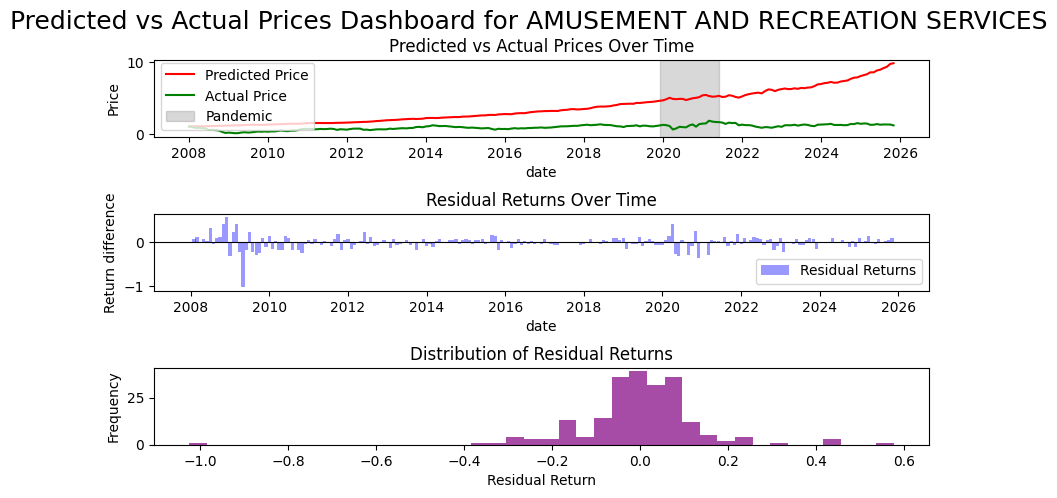

In [10]:
plot_dashboard_pred_vs_actual_prices(monthly_predicted_returns["AMUSEMENT AND RECREATION SERVICES"], 
                                     asset_name="AMUSEMENT AND RECREATION SERVICES")

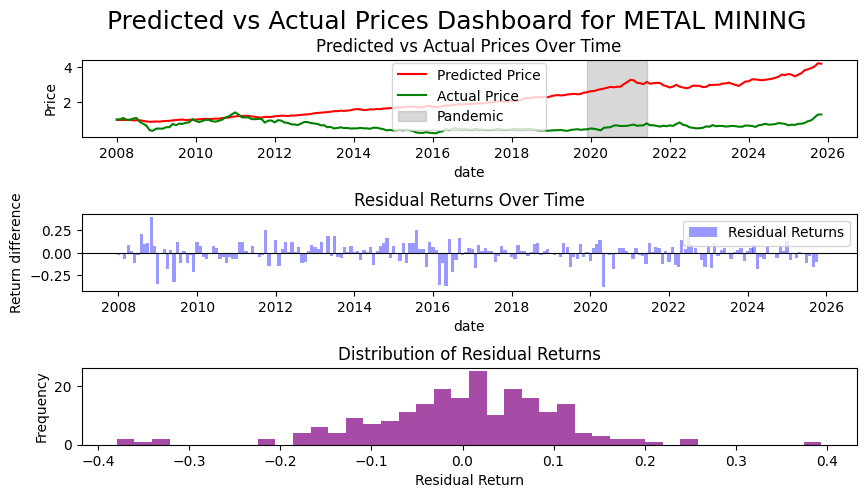

In [11]:
plot_dashboard_pred_vs_actual_prices(monthly_predicted_returns["METAL MINING"], "METAL MINING")

# Factor loadings entire period

In [12]:
def plot_factor_loadings(
    factor_loadings: pd.DataFrame,
    asset_identifier: str,
    asset_name: str = None,
    factors_to_plot: Union[List[str], Literal["all"]] = "all",
    confidence_interval_stdev: float = 1.0
)-> None:
    """ 
    Function to plot factor loadings as a forest plot.
    It plots the expected value and a confidence intervals for each factor.
    Expects a multi-index DataFrame with the factor loadings and their stdevs.
    
    Parameters
    ----------
    factor_loadings : pd.DataFrame
        DataFrame containing the factor loadings.
        Expects the loadings to be rows of the Series.
        Expects the loadings to be in the "Beta" index.
        Expects the stdev of the loadings to be in the "Stdev" index.
    asset_identifier : str
        Identifier of the asset to plot.
    asset_name : str = None
        Optional name of the asset to plot
        If omitted, defaults to using the asset_identifier
        Default is None.
    factors_to_plot : Union[List[str], Literal["all"]] = "all"
        List of factors to plot.
        If "all", plots all factors found in the factor_loadings Series.
        Default is "all".
    confidence_interval_stdev : float = 1.0
        Allows to specify the width of the confidence interval in stdevs.
        Default is 1 stdev (approximately 68% confidence interval for normal distributions).

    Returns
    -------
    None:
        Plots the forest plot of the factor loadings.
    """
    factor_loadings = factor_loadings[asset_identifier]

    stdevs: pd.DataFrame = factor_loadings.loc["Stdev"]
    betas: pd.DataFrame = factor_loadings.loc["Beta"]

    if factors_to_plot == "all":
        factors_to_plot: List[str] = betas.index.tolist()

    
    # DataFrame to carry the factor loadings for plotting
    factor_loadings_data_df: pd.DataFrame = pd.DataFrame(columns=["Estimate", "CI_Lower", "CI_Upper"])

    # Extract the info for each factor
    for factor in factors_to_plot:
        beta: float = betas[factor]
        stdev: float = stdevs[factor]

        if beta is not None and stdev is not None:
            ci_lower: float = beta - confidence_interval_stdev * stdev
            ci_upper: float = beta + confidence_interval_stdev * stdev

            factor_loadings_data_df.loc[factor] = [beta, ci_lower, ci_upper]

    xpos = np.arange(len(factors_to_plot))
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(8, 6))

    # Confidence intervals
    ax.vlines(factor_loadings_data_df.index, 
              ymin=factor_loadings_data_df["CI_Lower"],
              ymax=factor_loadings_data_df["CI_Upper"],
              color='grey', alpha=0.6, linewidth=14) 

    # Point estimates
    ax.plot(xpos, 
            factor_loadings_data_df["Estimate"], 
            "_", color='black',
            markersize=14)
    
    # 0 reference line
    ax.axhline(0, linestyle='--', linewidth=1, color='black')

    # Formatting
    name: str = asset_name if asset_name is not None else asset_identifier
    ax.set_xticks(xpos)
    ax.set_xticklabels(factors_to_plot, rotation=45, ha='right')
    ax.set_ylabel("Estimated Factor Loading")
    ax.set_title(f"Forest Plot of Factor Loadings for {name}", fontsize=22)

    plt.tight_layout()
    plt.show()


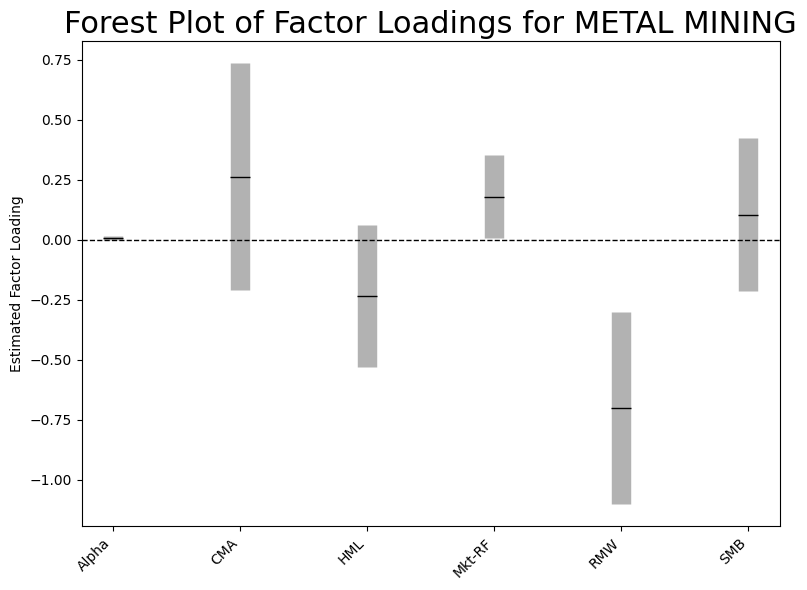

In [13]:
plot_factor_loadings(
    factor_loadings=monthly_factor_loadings,
    asset_identifier="METAL MINING",
    asset_name="METAL MINING")

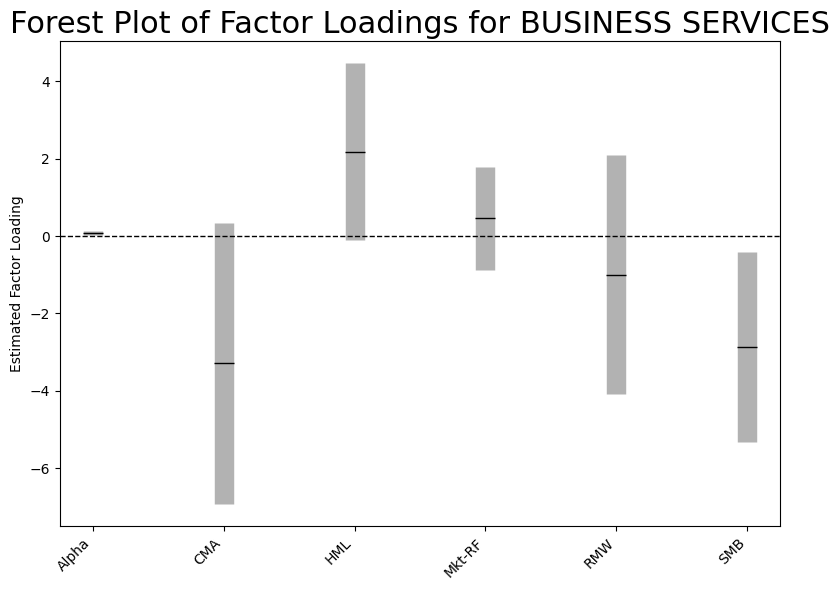

In [14]:
plot_factor_loadings(
    factor_loadings=monthly_factor_loadings,
    asset_identifier="BUSINESS SERVICES - Small Cap",
    asset_name="BUSINESS SERVICES")

## Factor Loadings Small vs Large cap

In [15]:
def compare_factor_loadings(
    factor_loadings: pd.DataFrame,
    asset_identifiers: List[str],
    title: str = None,
    factors_to_plot: Union[List[str], Literal["all"]] = "all",
    confidence_interval_stdev: float = 1.0
)-> None:
    """ 
    Function to plot factor loadings of different assets next to each other as a forest plot.
    It plots the expected value and a confidence intervals for each factor.
    Expects a multi-index DataFrame with the factor loadings and their stdevs.
    
    Parameters
    ----------
    factor_loadings : pd.DataFrame
        DataFrame containing the factor loadings.
        Expects the loadings to be rows of the Series.
        Expects the loadings to be in the "Beta" index.
        Expects the stdev of the loadings to be in the "Stdev" index.
    asset_identifiers : str
        Identifier of the assets to plot.
    title : str = None
        Optional title of the plot
        If omitted, defaults to using the asset_identifier
        Default is None.
    factors_to_plot : Union[List[str], Literal["all"]] = "all"
        List of factors to plot.
        If "all", plots all factors found in the factor_loadings Series.
        Default is "all".
    confidence_interval_stdev : float = 1.0
        Allows to specify the width of the confidence interval in stdevs.
        Default is 1 stdev (approximately 68% confidence interval for normal distributions).

    Returns
    -------
    None:
        Plots the forest plot of the factor loadings.
    """
    factor_loadings = factor_loadings[asset_identifiers]

    stdevs: pd.DataFrame = factor_loadings.xs("Stdev", level=0)
    betas: pd.DataFrame = factor_loadings.xs("Beta", level=0)
    
    if factors_to_plot == "all":
        factors_to_plot: List[str] = betas.index.tolist()

    # Subset to factors of interest
    betas = betas.loc[factors_to_plot, asset_identifiers]
    stdevs = stdevs.loc[factors_to_plot, asset_identifiers]

    # Pre-compute CIs as DataFrames (numeric, aligned)
    ci_lower = betas - confidence_interval_stdev * stdevs
    ci_upper = betas + confidence_interval_stdev * stdevs


    # ---- Plot: assets side-by-side per factor
    x = np.arange(len(factors_to_plot))
    m = len(asset_identifiers)

    width = 0.8
    offsets = (np.arange(m) - (m - 1) / 2) * (width / max(m, 1))

    fig, ax = plt.subplots(figsize=(10, 6))

    colour_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    asset_colour = {asset: colour_cycle[i % len(colour_cycle)] for i, asset in enumerate(asset_identifiers)}


    for j, asset in enumerate(asset_identifiers):
        xpos = x + offsets[j]

        y = betas[asset].to_numpy(dtype=float)
        ylow = ci_lower[asset].to_numpy(dtype=float)
        yhigh = ci_upper[asset].to_numpy(dtype=float)

        # CI lines
        ax.vlines(xpos, ylow, yhigh, linewidth=14, alpha=0.6, label=asset, color=asset_colour[asset])

        # Point estimates
        ax.plot(xpos, y, marker="_", linestyle="None", markersize=14, color="black")

    ax.axhline(0, linestyle="--", linewidth=1)

    ax.set_xticks(x)
    ax.set_xticklabels(factors_to_plot, rotation=45, ha="right")
    ax.set_ylabel("Estimated Factor Loading")

    title_name = title if title is not None else ", ".join(asset_identifiers)
    ax.set_title(f"Forest Plot of Factor Loadings comparison: {title_name}", fontsize=14)

    ax.legend(title="Asset", frameon=False)
    plt.tight_layout()
    plt.show()


In [16]:
def compare_factor_loadings_small_large(
    factor_loadings: pd.DataFrame,
    asset_identifier: str,
    asset_name: str = None,
    factors_to_plot: Union[List[str], Literal["all"]] = "all",
    confidence_interval_stdev: float = 1.0
)-> None:
    """
    Function to show a forest plot comparing the small Cap, large Cap and entire industry portfolio.
    It plots the expected value and a confidence intervals for each factor.

    Parameters
    ----------
    factor_loadings : pd.DataFrame
        Dataframe containing the factor loadings and their stdev
    asset_identifier : str,
        Identifier of the asset. This is then used with the " - Large Cap" and " - Small Cap" suffixes
    asset_name : str = None
        Optional name of the asset. Used in the title of the plot.
        If omitted, defaults to using the asset_identifier
        Default is None
    factors_to_plot : Union[List[str], Literal["all"]] = "all"
        Optional argument to specify which factors to plot
        Can be "all" or a list of the factors to plot
        Default is "all"
    confidence_interval_stdev : float = 1.0
        Optional argument to specify the confidence interval in terms of stdev
        Default is one stdev
    
    Returns
    -------
    None : Plots the forest plot
    """
    
    assets_to_plot: List[str] = [asset_identifier, f"{asset_identifier} - Large Cap", f"{asset_identifier} - Small Cap"]
    compare_factor_loadings(
        factor_loadings=factor_loadings,
        asset_identifiers=assets_to_plot,
        title=asset_name,
        factors_to_plot=factors_to_plot,
        confidence_interval_stdev=confidence_interval_stdev
    )

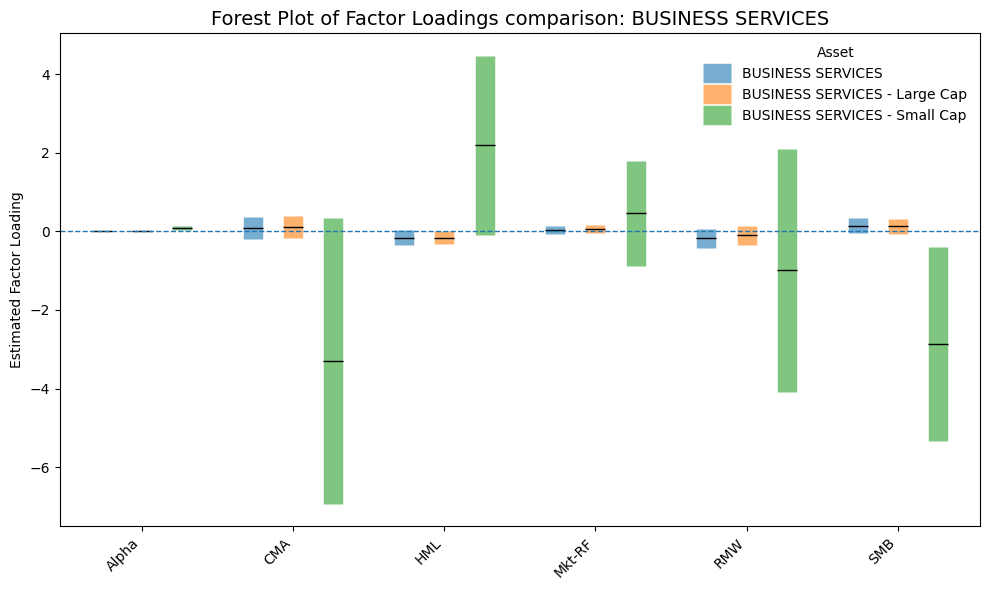

In [17]:
compare_factor_loadings_small_large(
    factor_loadings=monthly_factor_loadings,
    asset_identifier="BUSINESS SERVICES",
    asset_name="BUSINESS SERVICES")

# Factor loadings over time

In [18]:
def plot_factor_loadings_over_time(
    factor_loadings_over_time: pd.DataFrame,
    asset_identifier: str,
    asset_name: str = None,
    factors_to_plot: Union[List[str], Literal["all"]] = "all",
    confidence_interval_stdev: float = 1.0
)-> None:
    """ 
    Function to plot factor loadings for different timeperiods as a forest plot.
    It plots the expected value and a confidence intervals for each factor.
    Expects a multi-index DataFrame with the factor loadings and their stdevs for different timeperiods.
    
    Parameters
    ----------
    factor_loadings_over_time: pd.DataFrame
        DataFrame containing the factor loadings for different timeperiods
        Expects the loadings to be rows of the DataFrame and the timeperiods to be columns.
        Expects the loadings to be in the "Beta" index.
        Expects the stdev of the loadings to be in the "Stdev" index.
    asset_identifier: str
        Identifier of the asset to plot.
    asset_name: str = None
        Optional name of the asset to plot
        If omitted, defaults to using the asset_identifier
        Default is None.
    factors_to_plot: Union[List[str], Literal["all"]] = "all"
        List of factors to plot.
        If "all", plots all factors found in the factor_loadings Series.
        Default is "all".
    confidence_interval_stdev: float = 1.0
        Allows to specify the width of the confidence interval in stdevs.
        Default is 1 stdev (approximately 68% confidence interval for normal distributions).

    Returns
    -------
    None:
        Plots the forest plot of the factor loadings.
    """
    factor_loadings_over_time: pd.DataFrame = factor_loadings_over_time[asset_identifier]

    stdevs: pd.DataFrame = factor_loadings_over_time.loc["Stdev"]
    betas: pd.DataFrame = factor_loadings_over_time.loc["Beta"]

    if factors_to_plot == "all":
        factors_to_plot: List[str] = betas.index.tolist()

    num_factors: int = len(factors_to_plot)

    # Create one plot for each chart
    fig, axes = plt.subplots(1, num_factors, sharey=True, constrained_layout=True)#, figsize=(8, 5))
    if num_factors == 1:
            axes = [axes]  # make iterable

    # Use a color cycler for periods
    periods = betas.columns.tolist()
    ax_cycle = cycler(color=plt.cm.tab10.colors)  # you can choose another colormap

    for i, ax in enumerate(axes):
        factor: str = factors_to_plot[i]
        color_cycler = iter(ax_cycle)

        # Plot each period
        for period in periods:
            beta: float = betas.at[factor, period]
            stdev: float = stdevs.at[factor, period]
            ci_lower: float = beta - confidence_interval_stdev * stdev
            ci_upper: float = beta + confidence_interval_stdev * stdev

            color = next(color_cycler)['color']  # get next color

            ax.vlines(period, ymin=ci_lower, ymax=ci_upper, color=color, alpha=0.6, linewidth=8)
            ax.plot(period, beta, "_", color=color, markersize=8, label=str(period))

        # 0 reference line
        ax.axhline(0, linestyle='--', linewidth=1, color='black')

        # Title and remove x-axis labels
        ax.set_title(factor, fontsize=10)
        ax.set_xticks([])
        ax.set_xticklabels([])

    # Single legend (handles duplicates automatically)
    handles, labels = axes[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # remove duplicates
    fig.legend(
        by_label.values(),
        by_label.keys(),
        title="Period",
        loc="upper left",      # position relative to the figure
        borderaxespad=0.2,
        fontsize=6
    )

    # Shared y-axis label
    axes[0].set_ylabel("Estimated Factor Loading", labelpad=55, va = "baseline")

    # Main title
    name: str = asset_name if asset_name is not None else asset_identifier
    fig.suptitle(f"Factor loadings over time {name}",
                fontsize=16, y=1.05)
    plt.show()


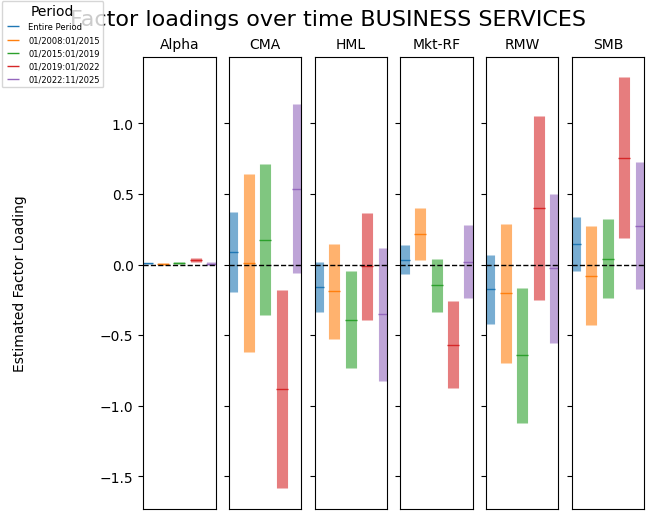

In [19]:
plot_factor_loadings_over_time(
    factor_loadings_over_time=factor_loadings_overtime,
    asset_identifier="BUSINESS SERVICES",
    asset_name="BUSINESS SERVICES"
)